# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch prices of both BTC and ETH in order to compute total value of crypto portfolio
btc_data = requests.get(btc_url).json()
eth_data = requests.get(eth_url).json()
btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crypto
btc_value = my_btc * btc_price
eth_value = my_eth * eth_price
crypto_value = btc_value + eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${btc_price:0.2f}.")
print(f"The current value of your {my_eth} ETH is ${eth_price:0.2f}.")

The current value of your 1.2 BTC is $23005.00.
The current value of your 5.3 ETH is $1643.82.


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
api_key = os.getenv("ALPACA_API_KEY")
api_secret = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    api_key,
    api_secret,
    api_version="v2")

In [43]:
# Format current date as ISO format
today = pd.Timestamp("2022-08-02", tz="America/New_York").isoformat()
today

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
portfolio_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = portfolio_df[portfolio_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = portfolio_df[portfolio_df['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
combined_df = pd.concat([AGG, SPY], axis=1, keys=['AGG','SPY'])

# Preview DataFrame
combined_df.head()

AGG                                     \
                             open     high      low   close   volume   
timestamp                                                              
2022-08-02 04:00:00+00:00  104.27  104.345  103.135  103.16  6866294   

                                                      SPY                 \
                          trade_count        vwap    open   high     low   
timestamp                                                                  
2022-08-02 04:00:00+00:00       38447  103.522774  409.03  413.0  406.82   

                                                                    
                            close    volume trade_count       vwap  
timestamp                                                           
2022-08-02 04:00:00+00:00  408.06  62899337      500630  409.63974

In [44]:
# Pick AGG and SPY close prices
agg_close_price = combined_df['AGG']['close'].item()
spy_close_price = combined_df['SPY']['close'].item()

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $103.16
Current SPY closing price: $408.06


In [45]:
# Compute the current value of shares
my_agg_value = my_spy * agg_close_price
my_spy_value = my_agg * spy_close_price
share_value = my_agg_value + my_spy_value

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f'The current value of your shares is ${share_value:0.2f}')

The current value of your 50 SPY shares is $81612.00
The current value of your 200 AGG shares is $5158.00
The current value of your shares is $86770.00


### Savings Health Analysis

In [46]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
investment_data = {'AMOUNT': [crypto_value, share_value]}
investments = ['CRYPTO','SHARES']
# Create savings DataFrame, organize by name using index
savings_df = pd.DataFrame(investment_data, index=investments)

# Display savings DataFrame
savings_df

,AMOUNT
CRYPTO,36318.246
SHARES,86770.000


<AxesSubplot:title={'center':'Savings Pie Chart'}, ylabel='AMOUNT'>

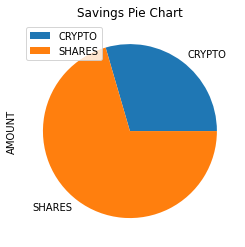

In [47]:
# Plot savings pie chart
savings_df.plot.pie(y='AMOUNT', title='Savings Pie Chart')

In [48]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_value + share_value

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations! You have met your emergency fund goal, with ${(total_savings - emergency_fund):0.2f} of FUN MONEY on the table!")
elif total_savings == emergency_fund:
    print(f"Congratulations! You have reached your financial goal and your emegency funds meets your minimum requirement of ${(emergency_fund):0.2f}")
else: 
    print(f"You are ${(emergency_fund - total_savings):0.2f} away from reaching your emergency fund goal of ${(emergency_fund):0.2f}. Keep Grinding!")

Congratulations! You have met your emergency fund goal, with $87088.25 of FUN MONEY on the table!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [49]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-07-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-07-01', tz='America/New_York').isoformat()

In [50]:
#Set Timeframe
timeframe='1Day'
# Get 5 years' worth of historical data for SPY and AGG
share_ticker_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Separate ticker data
AGG_df = share_ticker_data[share_ticker_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY_df = share_ticker_data[share_ticker_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
share_data = pd.concat([AGG_df, SPY_df], axis=1, keys=["AGG", "SPY"])
# Display sample data
share_data

AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2017-07-03 04:00:00+00:00  109.30  109.3000  109.010  109.09  1817281   
2017-07-05 04:00:00+00:00  109.08  109.1800  109.000  109.15  4288609   
2017-07-06 04:00:00+00:00  108.95  109.0000  108.820  108.94  2284910   
2017-07-07 04:00:00+00:00  108.89  108.9500  108.830  108.90  2727445   
2017-07-10 04:00:00+00:00  108.97  109.0200  108.890  108.95  2386444   
...                           ...       ...      ...     ...      ...   
2022-06-27 04:00:00+00:00  100.68  100.9450  100.475  100.60  8262512   
2022-06-28 04:00:00+00:00  100.53  100.6600  100.395  100.64  6410634   
2022-06-29 04:00:00+00:00  100.80  101.2350  100.680  101.22  7322871   
2022-06-30 04:00:00+00:00  101.60  101.9550  101.575  101.68  7520901   
2022-07-01 04:00:00+00:00  102.21  102.7874  102.090  102.34  7274799   

                                                      SPY                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2017-07-03 04:00:00+00:00        7321  109.130388  242.90  243.3800  242.2100   
2017-07-05 04:00:00+00:00       12388  109.122387  242.61  243.0100  241.7000   
2017-07-06 04:00:00+00:00       10712  108.928442  241.86  242.0300  240.3400   
2017-07-07 04:00:00+00:00        9963  108.889505  241.18  242.2800  240.5645   
2017-07-10 04:00:00+00:00        9654  108.953151  241.98  242.8000  241.7600   
...                               ...         ...     ...       ...       ...   
2022-06-27 04:00:00+00:00       33194  100.694460  391.12  391.3600  387.4400   
2022-06-28 04:00:00+00:00       26098  100.579369  390.30  393.1600  380.5300   
2022-06-29 04:00:00+00:00       21262  101.097062  381.16  382.2700  378.4200   
2022-06-30 04:00:00+00:00       22372  101.771839  376.27  380.6582  372.5600   
2022-07-01 04:00:00+00:00       26198  102.348326  376.60  381.7000  373.8000   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2017-07-03 04:00:00+00:00  242.21   39153806      134045  242.802969  
2017-07-05 04:00:00+00:00  242.77   54427596      184987  242.525892  
2017-07-06 04:00:00+00:00  240.55   66115317      243341  241.125448  
2017-07-07 04:00:00+00:00  242.11   57972268      170407  241.801297  
2017-07-10 04:00:00+00:00  242.37   36663274      138842  242.377829  
...                           ...        ...         ...         ...  
2022-06-27 04:00:00+00:00  388.59   65967268      552197  389.085434  
2022-06-28 04:00:00+00:00  380.65   86376255      641197  384.912075  
2022-06-29 04:00:00+00:00  380.34   64478427      519970  380.393953  
2022-06-30 04:00:00+00:00  377.25  112269284      799487  377.083807  
2022-07-01 04:00:00+00:00  381.24   74165514      601221  378.221516  

[1259 rows x 14 columns]

In [51]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC = MCSimulation(
    portfolio_data = share_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [52]:
# Printing the simulation input data
MC.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2017-07-03 04:00:00+00:00  109.30  109.30  109.01  109.09  1817281   
2017-07-05 04:00:00+00:00  109.08  109.18  109.00  109.15  4288609   
2017-07-06 04:00:00+00:00  108.95  109.00  108.82  108.94  2284910   
2017-07-07 04:00:00+00:00  108.89  108.95  108.83  108.90  2727445   
2017-07-10 04:00:00+00:00  108.97  109.02  108.89  108.95  2386444   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-07-03 04:00:00+00:00        7321  109.130388          NaN  242.90   
2017-07-05 04:00:00+00:00       12388  109.122387     0.000550  242.61   
2017-07-06 04:00:00+00:00       10712  108.928442    -0.001924  241.86   
2017-07-07 04:00:00+00:00        9963  108.889505    -0.000367  241.18   
2017-07-10 04:00:00+00:00        9654  108.953151     0.000459  241.98   

                                                                           \
                             high       low   close    volume trade_count   
timestamp                                                                   
2017-07-03 04:00:00+00:00  243.38  242.2100  242.21  39153806      134045   
2017-07-05 04:00:00+00:00  243.01  241.7000  242.77  54427596      184987   
2017-07-06 04:00:00+00:00  242.03  240.3400  240.55  66115317      243341   
2017-07-07 04:00:00+00:00  242.28  240.5645  242.11  57972268      170407   
2017-07-10 04:00:00+00:00  242.80  241.7600  242.37  36663274      138842   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-07-03 04:00:00+00:00  242.802969          NaN  
2017-07-05 04:00:00+00:00  242.525892     0.002312  
2017-07-06 04:00:00+00:00  241.125448    -0.009144  
2017-07-07 04:00:00+00:00  241.801297     0.006485  
2017-07-10 04:00:00+00:00  242.377829     0.001074

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/Dylan/Desktop/FinTech/Module 5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993535,1.000602,1.008882,0.997933,1.010069,1.004183,0.993124,1.006554,0.997356,1.017450,...,1.002225,1.012738,0.993538,0.995019,1.001271,1.001202,0.990782,0.998580,0.992151,0.990314
2,1.001258,1.007907,1.007274,1.001206,1.009480,0.998734,0.987859,1.003238,0.999750,1.018318,...,1.011826,1.022231,0.993616,1.001693,0.995557,1.007506,0.989173,0.988194,0.989265,0.993700
3,1.000147,1.029058,1.005756,1.000771,1.025526,0.987058,0.995891,1.000561,1.009841,1.028960,...,1.003522,1.032673,0.986824,1.025211,0.984416,1.009971,0.993927,0.991547,0.990585,0.996880
4,1.015950,1.034975,0.996357,0.996870,1.042196,0.998729,0.990813,0.990371,1.014704,1.034718,...,1.010643,1.036683,0.979035,1.034651,0.977482,1.010782,0.992216,0.976813,1.000875,0.984652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.441883,8.362829,6.247717,7.824652,2.779476,1.989777,6.029077,10.382448,7.370483,14.946494,...,4.116352,3.682139,7.673950,5.205872,18.375363,5.762118,11.232197,18.755070,3.808648,2.735720
7557,6.539672,8.418478,6.221780,7.853686,2.753040,1.970673,6.039625,10.443097,7.500545,14.869907,...,4.082937,3.687912,7.727153,5.189160,18.446794,5.730491,11.172644,18.513553,3.804131,2.721859
7558,6.532783,8.392368,6.198219,7.884305,2.741647,1.968338,5.944396,10.326681,7.658478,14.774088,...,4.103579,3.677474,7.650646,5.166025,18.286188,5.709003,11.049590,18.713685,3.776348,2.679994
7559,6.490733,8.418472,6.088679,7.847035,2.735132,1.980956,5.996548,10.178354,7.743371,14.963631,...,4.133344,3.679760,7.622287,5.152085,18.399035,5.733397,11.084775,18.674962,3.819896,2.675076


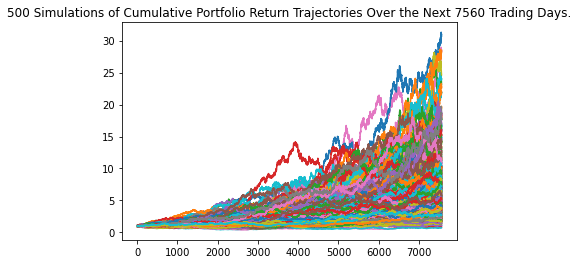

In [19]:
# Plot simulation outcomes
line_plot = MC.plot_simulation()

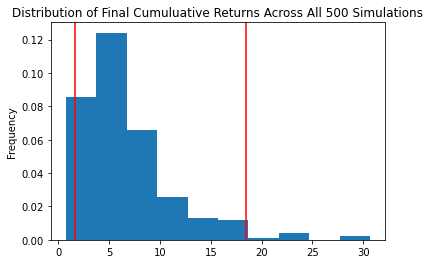

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              6.690090
std               4.583657
min               0.720282
25%               3.682377
50%               5.442418
75%               8.253948
max              30.683905
95% CI Lower      1.608423
95% CI Upper     18.476164
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $32168.47 and $369523.29


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $48252.7 and $554284.93


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = share_data,
    weights = [.2,.8],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2017-07-03 04:00:00+00:00  109.30  109.30  109.01  109.09  1817281   
2017-07-05 04:00:00+00:00  109.08  109.18  109.00  109.15  4288609   
2017-07-06 04:00:00+00:00  108.95  109.00  108.82  108.94  2284910   
2017-07-07 04:00:00+00:00  108.89  108.95  108.83  108.90  2727445   
2017-07-10 04:00:00+00:00  108.97  109.02  108.89  108.95  2386444   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-07-03 04:00:00+00:00        7321  109.130388          NaN  242.90   
2017-07-05 04:00:00+00:00       12388  109.122387     0.000550  242.61   
2017-07-06 04:00:00+00:00       10712  108.928442    -0.001924  241.86   
2017-07-07 04:00:00+00:00        9963  108.889505    -0.000367  241.18   
2017-07-10 04:00:00+00:00        9654  108.953151     0.000459  241.98   

                                                                           \
                             high       low   close    volume trade_count   
timestamp                                                                   
2017-07-03 04:00:00+00:00  243.38  242.2100  242.21  39153806      134045   
2017-07-05 04:00:00+00:00  243.01  241.7000  242.77  54427596      184987   
2017-07-06 04:00:00+00:00  242.03  240.3400  240.55  66115317      243341   
2017-07-07 04:00:00+00:00  242.28  240.5645  242.11  57972268      170407   
2017-07-10 04:00:00+00:00  242.80  241.7600  242.37  36663274      138842   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-07-03 04:00:00+00:00  242.802969          NaN  
2017-07-05 04:00:00+00:00  242.525892     0.002312  
2017-07-06 04:00:00+00:00  241.125448    -0.009144  
2017-07-07 04:00:00+00:00  241.801297     0.006485  
2017-07-10 04:00:00+00:00  242.377829     0.001074

In [26]:
# Plot simulation outcomes
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/Dylan/Desktop/FinTech/Module 5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.967256,1.008527,1.011474,1.001279,0.994435,0.999057,0.996138,0.987073,0.995559,1.014055,...,1.010065,0.998855,0.999400,0.996684,0.993494,0.995480,1.000900,1.006516,1.008116,0.998290
2,0.974472,0.994794,1.033480,1.013638,0.981219,1.009760,1.007089,0.983754,0.997251,1.017552,...,0.998345,0.989893,1.016906,0.987670,0.999817,0.999989,1.005615,1.010940,1.027932,0.985574
3,0.982040,0.987765,1.035574,1.009860,0.974819,1.022287,1.024741,0.977482,0.995040,1.018864,...,0.976474,0.997805,1.021360,0.992859,1.007595,0.992267,1.009564,1.019522,1.041823,0.999812
4,0.979803,0.997798,1.042908,1.012973,0.983421,1.014004,1.040687,0.973333,0.977825,1.027750,...,0.970204,0.993450,1.025285,0.991806,0.996415,0.999117,1.001183,1.015515,1.048934,1.003416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.286194,1.668039,2.306891,2.417940,2.070689,1.482026,1.112504,2.125341,2.185622,0.954173,...,2.228407,0.941640,1.975100,1.874570,0.998225,1.324714,1.420989,0.727304,1.622485,1.821464
1257,1.286018,1.646643,2.301752,2.406549,2.064153,1.471485,1.117840,2.134369,2.145498,0.966793,...,2.270086,0.940592,1.979295,1.887500,0.983151,1.327071,1.414194,0.726483,1.645488,1.851702
1258,1.287394,1.648543,2.333228,2.401153,2.110552,1.456728,1.123706,2.156119,2.164526,0.959127,...,2.270601,0.939804,1.962196,1.912921,0.985737,1.324958,1.411504,0.714956,1.656107,1.856598
1259,1.289638,1.643753,2.322070,2.387307,2.127687,1.472673,1.127777,2.180656,2.173824,0.960175,...,2.277038,0.938625,1.982131,1.895454,0.984847,1.328203,1.395131,0.704451,1.645154,1.861552


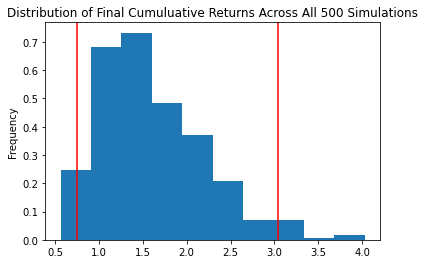

In [27]:
# Plot probability distribution and confidence intervals
dist_plot_five_year = MC_five_year.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.602972
std               0.597076
min               0.563215
25%               1.150419
50%               1.488394
75%               1.969716
max               4.030270
95% CI Lower      0.755819
95% CI Upper      3.040941
Name: 1260, dtype: float64


In [41]:
# Set initial investment
initial_investment = 20000 * 2

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five_year = round(tbl[8] * initial_investment,2)
ci_upper_five_year = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five_year} and ${ci_upper_five_year}")

There is a 95% chance that an initial investment of $40000 in the portfolio over the next 5 years will end within in the range of $32202.04 and $168578.31


### Ten Years Retirement Option

In [33]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = share_data,
    weights = [.35,.65],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [34]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2017-07-03 04:00:00+00:00  109.30  109.30  109.01  109.09  1817281   
2017-07-05 04:00:00+00:00  109.08  109.18  109.00  109.15  4288609   
2017-07-06 04:00:00+00:00  108.95  109.00  108.82  108.94  2284910   
2017-07-07 04:00:00+00:00  108.89  108.95  108.83  108.90  2727445   
2017-07-10 04:00:00+00:00  108.97  109.02  108.89  108.95  2386444   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-07-03 04:00:00+00:00        7321  109.130388          NaN  242.90   
2017-07-05 04:00:00+00:00       12388  109.122387     0.000550  242.61   
2017-07-06 04:00:00+00:00       10712  108.928442    -0.001924  241.86   
2017-07-07 04:00:00+00:00        9963  108.889505    -0.000367  241.18   
2017-07-10 04:00:00+00:00        9654  108.953151     0.000459  241.98   

                                                                           \
                             high       low   close    volume trade_count   
timestamp                                                                   
2017-07-03 04:00:00+00:00  243.38  242.2100  242.21  39153806      134045   
2017-07-05 04:00:00+00:00  243.01  241.7000  242.77  54427596      184987   
2017-07-06 04:00:00+00:00  242.03  240.3400  240.55  66115317      243341   
2017-07-07 04:00:00+00:00  242.28  240.5645  242.11  57972268      170407   
2017-07-10 04:00:00+00:00  242.80  241.7600  242.37  36663274      138842   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-07-03 04:00:00+00:00  242.802969          NaN  
2017-07-05 04:00:00+00:00  242.525892     0.002312  
2017-07-06 04:00:00+00:00  241.125448    -0.009144  
2017-07-07 04:00:00+00:00  241.801297     0.006485  
2017-07-10 04:00:00+00:00  242.377829     0.001074

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/Dylan/Desktop/FinTech/Module 5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

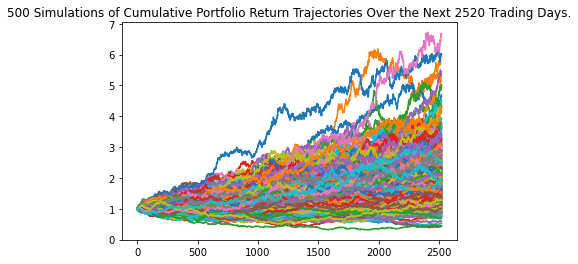

In [35]:
# Plot simulation outcomes
line_plot = MC_ten_year.plot_simulation()

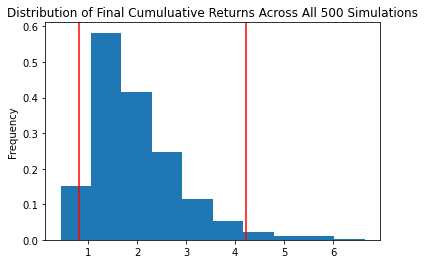

In [36]:
# Plot probability distribution and confidence intervals
dist_plot = MC_ten_year.plot_distribution()

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.974850
std               0.894992
min               0.432247
25%               1.352472
50%               1.753861
75%               2.383142
max               6.648956
95% CI Lower      0.805051
95% CI Upper      4.214458
Name: 2520, dtype: float64


In [42]:
# Set initial investment
initial_investment = 20000 * 2

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten_year = round(tbl[8] * initial_investment,2)
ci_upper_ten_year = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten_year} and ${ci_upper_ten_year}")

There is a 95% chance that an initial investment of $40000 in the portfolio over the next 10 years will end within in the range of $32202.04 and $168578.31
